# 1 - 1. Import and Install Dependencies

 !pip install mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2- keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [99]:
cap.release()
cv2.destroyAllWindows() 


In [ ]:
plt.show()
cap.release()
cv2.destroyAllWindows


In [100]:
len(results.left_hand_landmarks.landmark)

21

In [101]:
draw_landmarks(frame, results)

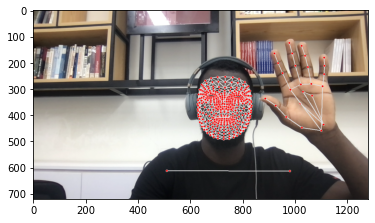

In [33]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract keypoint values


In [126]:
results.pose_landmarks

landmark {
  x: 0.528830885887146
  y: 0.7279375791549683
  z: -0.9644500613212585
  visibility: 0.9957959651947021
}
landmark {
  x: 0.5543743371963501
  y: 0.713886022567749
  z: -1.0017783641815186
  visibility: 0.9987602233886719
}
landmark {
  x: 0.5632960200309753
  y: 0.708244800567627
  z: -1.0016453266143799
  visibility: 0.9985663294792175
}
landmark {
  x: 0.5722017288208008
  y: 0.7028597593307495
  z: -1.0019655227661133
  visibility: 0.9985188841819763
}
landmark {
  x: 0.5199028253555298
  y: 0.7085140347480774
  z: -0.9889140129089355
  visibility: 0.9980681538581848
}
landmark {
  x: 0.512887716293335
  y: 0.7099001407623291
  z: -0.9891225695610046
  visibility: 0.9977136850357056
}
landmark {
  x: 0.5098879933357239
  y: 0.710334300994873
  z: -0.989232063293457
  visibility: 0.9976338148117065
}
landmark {
  x: 0.5963714122772217
  y: 0.6547695398330688
  z: -0.9244927167892456
  visibility: 0.9995550513267517
}
landmark {
  x: 0.5064767003059387
  y: 0.679794132709

In [127]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()  if results.right_hand_landmarks else np.zeros(21*3)
face= np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()  if results.face_landmarks else np.zeros(1404)

In [128]:
len(results.face_landmarks.landmark)*3

1404

In [129]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [130]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [132]:
result_test = extract_keypoints(results)[:-10]

In [133]:
468*3+33*4+21*3+21*3

1662

In [46]:
np.save('0',result_test)

# Setup Folders for collection


In [10]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30


In [11]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [15]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [16]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and create Labels and Features

In [103]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [104]:
label_map = {label:num for num, label in enumerate(actions)}

In [105]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [106]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [107]:
np.array(sequences).shape

(90, 30, 1662)

In [108]:
np.array(labels).shape

(90,)

In [109]:
X = np.array(sequences)

In [110]:
X.shape

(90, 30, 1662)

In [111]:
y = to_categorical(labels).astype(int)

In [112]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [114]:
y_train.shape

(85, 3)

In [115]:
y_test.shape

(5, 3)

# Build and train LSTM Neural Network

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [61]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [62]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [64]:
model.fit(X_train, y_train, epochs=2000
          , callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 68ms/step - loss: 2.1159 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.8464 - categorical_accuracy: 0.3882
Epoch 3/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.4201 - categorical_accuracy: 0.4353
Epoch 4/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.9305 - categorical_accuracy: 0.3647
Epoch 5/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.4959 - categorical_accuracy: 0.4353
Epoch 6/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.9214 - categorical_accuracy: 0.3176
Epoch 7/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0825 - categorical_accuracy: 0.4235
Epoch 8/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.3182 - categorical_accuracy: 0.3765
Epoch 9/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.2799 - categorical_accuracy: 0.3412
E

3/3 [==============================] - 0s 62ms/step - loss: 1.4573 - categorical_accuracy: 0.4941
Epoch 75/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.3274 - categorical_accuracy: 0.5176
Epoch 76/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1872 - categorical_accuracy: 0.4471
Epoch 77/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.3583 - categorical_accuracy: 0.5059
Epoch 78/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0525 - categorical_accuracy: 0.5059
Epoch 79/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.9857 - categorical_accuracy: 0.5647
Epoch 80/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0593 - categorical_accuracy: 0.5529
Epoch 81/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.9381 - categorical_accuracy: 0.6235
Epoch 82/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0146 - categorical_accuracy: 0.4941
Epoch 

3/3 [==============================] - 0s 56ms/step - loss: 0.5776 - categorical_accuracy: 0.7294
Epoch 219/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.5909 - categorical_accuracy: 0.6706
Epoch 220/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.5944 - categorical_accuracy: 0.6941
Epoch 221/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.6351 - categorical_accuracy: 0.6941
Epoch 222/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.6701 - categorical_accuracy: 0.6235
Epoch 223/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6597 - categorical_accuracy: 0.6706
Epoch 224/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.5860 - categorical_accuracy: 0.6824
Epoch 225/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5468 - categorical_accuracy: 0.6941
Epoch 226/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5982 - categorical_accuracy: 0.647

3/3 [==============================] - 0s 59ms/step - loss: 0.4434 - categorical_accuracy: 0.7765
Epoch 363/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3717 - categorical_accuracy: 0.8235
Epoch 364/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4041 - categorical_accuracy: 0.8706
Epoch 365/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3586 - categorical_accuracy: 0.8706
Epoch 366/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3421 - categorical_accuracy: 0.8471
Epoch 367/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2149 - categorical_accuracy: 0.9176
Epoch 368/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2267 - categorical_accuracy: 0.9294
Epoch 369/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1781 - categorical_accuracy: 0.9647
Epoch 370/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1278 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 66ms/step - loss: 0.0070 - categorical_accuracy: 1.0000
Epoch 507/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 508/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 509/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0067 - categorical_accuracy: 1.0000
Epoch 510/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0067 - categorical_accuracy: 1.0000
Epoch 511/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0067 - categorical_accuracy: 1.0000
Epoch 512/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 513/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 514/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0064 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 68ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 652/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 653/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 654/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 655/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 656/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 657/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 658/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0013 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 66ms/step - loss: 6.7641e-04 - categorical_accuracy: 1.0000
Epoch 792/2000
3/3 [==============================] - 0s 62ms/step - loss: 6.6777e-04 - categorical_accuracy: 1.0000
Epoch 793/2000
3/3 [==============================] - 0s 68ms/step - loss: 6.6778e-04 - categorical_accuracy: 1.0000
Epoch 794/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.6254e-04 - categorical_accuracy: 1.0000
Epoch 795/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.6334e-04 - categorical_accuracy: 1.0000
Epoch 796/2000
3/3 [==============================] - 0s 69ms/step - loss: 6.6382e-04 - categorical_accuracy: 1.0000
Epoch 797/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.5773e-04 - categorical_accuracy: 1.0000
Epoch 798/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.5496e-04 - categorical_accuracy: 1.0000
Epoch 799/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.56

3/3 [==============================] - 0s 63ms/step - loss: 4.0884e-04 - categorical_accuracy: 1.0000
Epoch 932/2000
3/3 [==============================] - 0s 63ms/step - loss: 4.0783e-04 - categorical_accuracy: 1.0000
Epoch 933/2000
3/3 [==============================] - 0s 61ms/step - loss: 4.0332e-04 - categorical_accuracy: 1.0000
Epoch 934/2000
3/3 [==============================] - 0s 63ms/step - loss: 4.0473e-04 - categorical_accuracy: 1.0000
Epoch 935/2000
3/3 [==============================] - 0s 64ms/step - loss: 4.0565e-04 - categorical_accuracy: 1.0000
Epoch 936/2000
3/3 [==============================] - 0s 64ms/step - loss: 4.0451e-04 - categorical_accuracy: 1.0000
Epoch 937/2000
3/3 [==============================] - 0s 63ms/step - loss: 3.9807e-04 - categorical_accuracy: 1.0000
Epoch 938/2000
3/3 [==============================] - 0s 64ms/step - loss: 3.9753e-04 - categorical_accuracy: 1.0000
Epoch 939/2000
3/3 [==============================] - 0s 62ms/step - loss: 3.94

3/3 [==============================] - 0s 72ms/step - loss: 2.5529e-04 - categorical_accuracy: 1.0000
Epoch 1071/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.5160e-04 - categorical_accuracy: 1.0000
Epoch 1072/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.5277e-04 - categorical_accuracy: 1.0000
Epoch 1073/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.5148e-04 - categorical_accuracy: 1.0000
Epoch 1074/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.5048e-04 - categorical_accuracy: 1.0000
Epoch 1075/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.4944e-04 - categorical_accuracy: 1.0000
Epoch 1076/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.4820e-04 - categorical_accuracy: 1.0000
Epoch 1077/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.4767e-04 - categorical_accuracy: 1.0000
Epoch 1078/2000
3/3 [==============================] - 0s 68ms/step - lo

3/3 [==============================] - 0s 63ms/step - loss: 1.7319e-04 - categorical_accuracy: 1.0000
Epoch 1209/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7294e-04 - categorical_accuracy: 1.0000
Epoch 1210/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.7203e-04 - categorical_accuracy: 1.0000
Epoch 1211/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7154e-04 - categorical_accuracy: 1.0000
Epoch 1212/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.7113e-04 - categorical_accuracy: 1.0000
Epoch 1213/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7148e-04 - categorical_accuracy: 1.0000
Epoch 1214/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7056e-04 - categorical_accuracy: 1.0000
Epoch 1215/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.7111e-04 - categorical_accuracy: 1.0000
Epoch 1216/2000
3/3 [==============================] - 0s 61ms/step - lo

3/3 [==============================] - 0s 71ms/step - loss: 1.2478e-04 - categorical_accuracy: 1.0000
Epoch 1347/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2400e-04 - categorical_accuracy: 1.0000
Epoch 1348/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2357e-04 - categorical_accuracy: 1.0000
Epoch 1349/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.2310e-04 - categorical_accuracy: 1.0000
Epoch 1350/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2312e-04 - categorical_accuracy: 1.0000
Epoch 1351/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2291e-04 - categorical_accuracy: 1.0000
Epoch 1352/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.2240e-04 - categorical_accuracy: 1.0000
Epoch 1353/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.2236e-04 - categorical_accuracy: 1.0000
Epoch 1354/2000
3/3 [==============================] - 0s 70ms/step - lo

3/3 [==============================] - 0s 63ms/step - loss: 9.1239e-05 - categorical_accuracy: 1.0000
Epoch 1485/2000
3/3 [==============================] - 0s 62ms/step - loss: 9.0634e-05 - categorical_accuracy: 1.0000
Epoch 1486/2000
3/3 [==============================] - 0s 62ms/step - loss: 9.0433e-05 - categorical_accuracy: 1.0000
Epoch 1487/2000
3/3 [==============================] - 0s 62ms/step - loss: 9.0442e-05 - categorical_accuracy: 1.0000
Epoch 1488/2000
3/3 [==============================] - 0s 63ms/step - loss: 9.0946e-05 - categorical_accuracy: 1.0000
Epoch 1489/2000
3/3 [==============================] - 0s 61ms/step - loss: 8.9872e-05 - categorical_accuracy: 1.0000
Epoch 1490/2000
3/3 [==============================] - 0s 64ms/step - loss: 8.9742e-05 - categorical_accuracy: 1.0000
Epoch 1491/2000
3/3 [==============================] - 0s 63ms/step - loss: 8.9386e-05 - categorical_accuracy: 1.0000
Epoch 1492/2000
3/3 [==============================] - 0s 62ms/step - lo

3/3 [==============================] - 0s 65ms/step - loss: 6.4913e-05 - categorical_accuracy: 1.0000
Epoch 1623/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.4673e-05 - categorical_accuracy: 1.0000
Epoch 1624/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.4329e-05 - categorical_accuracy: 1.0000
Epoch 1625/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.5184e-05 - categorical_accuracy: 1.0000
Epoch 1626/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.4235e-05 - categorical_accuracy: 1.0000
Epoch 1627/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.3919e-05 - categorical_accuracy: 1.0000
Epoch 1628/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.3557e-05 - categorical_accuracy: 1.0000
Epoch 1629/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.3733e-05 - categorical_accuracy: 1.0000
Epoch 1630/2000
3/3 [==============================] - 0s 63ms/step - lo

3/3 [==============================] - 0s 69ms/step - loss: 4.6577e-05 - categorical_accuracy: 1.0000
Epoch 1761/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.6643e-05 - categorical_accuracy: 1.0000
Epoch 1762/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.6357e-05 - categorical_accuracy: 1.0000
Epoch 1763/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.6697e-05 - categorical_accuracy: 1.0000
Epoch 1764/2000
3/3 [==============================] - 0s 69ms/step - loss: 4.6551e-05 - categorical_accuracy: 1.0000
Epoch 1765/2000
3/3 [==============================] - 0s 67ms/step - loss: 4.6174e-05 - categorical_accuracy: 1.0000
Epoch 1766/2000
3/3 [==============================] - 0s 66ms/step - loss: 4.6082e-05 - categorical_accuracy: 1.0000
Epoch 1767/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.5966e-05 - categorical_accuracy: 1.0000
Epoch 1768/2000
3/3 [==============================] - 0s 66ms/step - lo

3/3 [==============================] - 0s 69ms/step - loss: 3.6267e-05 - categorical_accuracy: 1.0000
Epoch 1899/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.5984e-05 - categorical_accuracy: 1.0000
Epoch 1900/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.5865e-05 - categorical_accuracy: 1.0000
Epoch 1901/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.5737e-05 - categorical_accuracy: 1.0000
Epoch 1902/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.5646e-05 - categorical_accuracy: 1.0000
Epoch 1903/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.5537e-05 - categorical_accuracy: 1.0000
Epoch 1904/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.5396e-05 - categorical_accuracy: 1.0000
Epoch 1905/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.5479e-05 - categorical_accuracy: 1.0000
Epoch 1906/2000
3/3 [==============================] - 0s 69ms/step - lo

In [52]:
print(model.history)

NameError: name 'keras' is not defined

In [65]:
res = model.predict(X_test)

1/1 [==============================] - 0s 309ms/step


In [66]:
actions[np.argmax(res[4])]

'iloveyou'

In [67]:
actions[np.argmax(y_test[4])]

'iloveyou'

# Save Weights

In [68]:
model.save('actions.h5')

In [2]:
from keras.models import load_model
model = load_model('actions.h5')

2022-09-04 13:10:16.984683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Evaluation Using Confusion Matrix and Accuracy

In [116]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [117]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 20ms/step


In [118]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [119]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[55,  0],
        [ 0, 30]],

       [[56,  0],
        [ 0, 29]],

       [[59,  0],
        [ 0, 26]]])

In [120]:
accuracy_score(ytrue, yhat)

1.0

# Test in Real Time

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [28]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

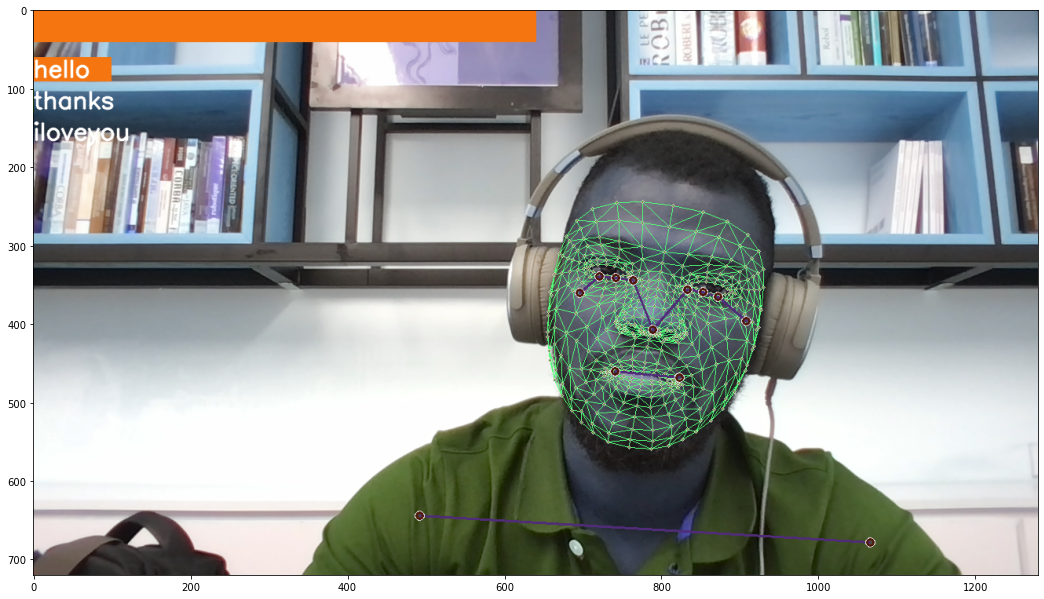

In [29]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [37]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyo

1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
iloveyou
<class 'mediapipe.python.solution_base.Solution

1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.p

1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===

1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.pyth

In [26]:
cap.release()
cv2.destroyAllWindows()